In [2]:
from __future__ import print_function

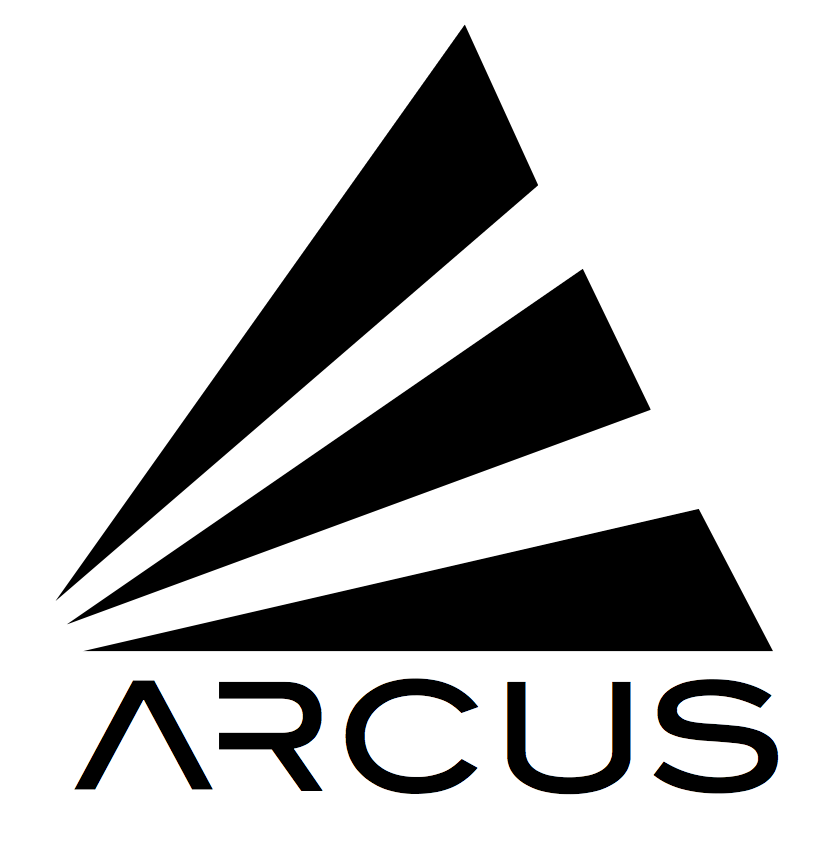

### Revision status: *early DRAFT*
file: SelectRowlandParameters.ipynb not found in repository (path missing or new file not yet commited?).
        No versioning information can be displayed.

This document is git version controlled. The repository is available at https://github.com/hamogu/arcus.
See git commit log for full revision history.

Code was last run with:

- MARXS ray-trace code version 1.2.dev607 (commit hash: 3ea4b76a2e from 2017-09-07)
- ARCUS python code version 0.0.dev89 (commit hash: 41724ebdb7 from 2017-09-11)
- ARCUS CALDB version hash: 98b1481 (commited on 2017-08-19 )


In [4]:
from nbtemplate import display_header, get_path
display_header('SelectRowlandParameters.ipynb', status='early DRAFT')

In [20]:
import os
import sys
from glob import glob
import functools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.table import Table
import astropy.units as u

%matplotlib inline

In [79]:
filelist = glob(os.path.join(get_path('grid2designtorus'), '*.fits'))

Reading config file with path definitions: ['../site.cfg']


In [80]:
filelist.sort()  # for display purposes. Also, makes the order more predictable
filelist

[u'/nfs/melkor/d1/guenther/Dropbox/ARCUS/grid2designtorus/0600_01.2_05800.fits',
 u'/nfs/melkor/d1/guenther/Dropbox/ARCUS/grid2designtorus/0600_01.4_05800.fits',
 u'/nfs/melkor/d1/guenther/Dropbox/ARCUS/grid2designtorus/0600_01.6_05800.fits',
 u'/nfs/melkor/d1/guenther/Dropbox/ARCUS/grid2designtorus/0600_01.8_05800.fits',
 u'/nfs/melkor/d1/guenther/Dropbox/ARCUS/grid2designtorus/0600_02.0_05800.fits',
 u'/nfs/melkor/d1/guenther/Dropbox/ARCUS/grid2designtorus/0600_02.2_05800.fits',
 u'/nfs/melkor/d1/guenther/Dropbox/ARCUS/grid2designtorus/0650_01.2_05800.fits',
 u'/nfs/melkor/d1/guenther/Dropbox/ARCUS/grid2designtorus/0650_01.4_05800.fits',
 u'/nfs/melkor/d1/guenther/Dropbox/ARCUS/grid2designtorus/0650_01.6_05800.fits',
 u'/nfs/melkor/d1/guenther/Dropbox/ARCUS/grid2designtorus/0650_01.8_05800.fits',
 u'/nfs/melkor/d1/guenther/Dropbox/ARCUS/grid2designtorus/0650_02.0_05800.fits',
 u'/nfs/melkor/d1/guenther/Dropbox/ARCUS/grid2designtorus/0650_02.2_05800.fits',
 u'/nfs/melkor/d1/guenther/D

In [81]:
p = Table.read(filelist[-4])
p['wave'] = p['energy'].to(u.Angstrom, equivalencies=u.spectral())

In [82]:
p['probability'].sum()

19060.524126922974

In [83]:
p = p.group_by('wave')

In [84]:
p_prob = p['wave', 'probability'].groups.aggregate(np.mean)

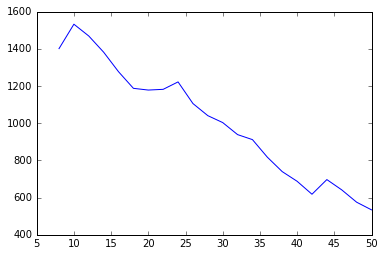

In [85]:
# replace number by meta['A_GEOM'] after rewriting all files.
# Factor 4 is there because we simulate only one channel in this grid for speed.
plt.plot(p_prob['wave'], p_prob['probability'] * p_prob.meta['A_GEOM'] * 4)

# This sill incluces everything - Photons that miss the detector, 0th order and dispersed etc.

In [86]:
p.colnames

['time',
 'energy',
 'polangle',
 'probability',
 'ra',
 'dec',
 'dir',
 'polarization',
 'aperture',
 'y',
 'z',
 'pos',
 'mirror_x',
 'mirror_y',
 'spo',
 'perpplanescatter',
 'inplanescatter',
 'grat_y',
 'grat_z',
 'facet',
 'blaze',
 'order',
 'circ_phi',
 'circ_y',
 'circpix_x',
 'circpix_y',
 'detfp_x',
 'detfp_y',
 'detfppix_y',
 'detfppix_x',
 'wave']

/nfs/melkor/d1/guenther/soft/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


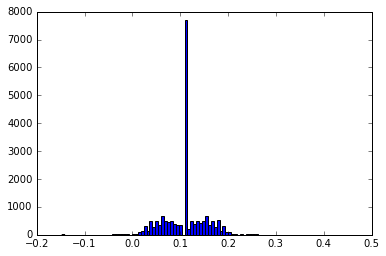

In [118]:
ind = np.isfinite(p['circ_phi']) & (p['order'] <= 1)
out = plt.hist(p['circ_phi'][ind], weights=p['probability'][ind], bins=100)

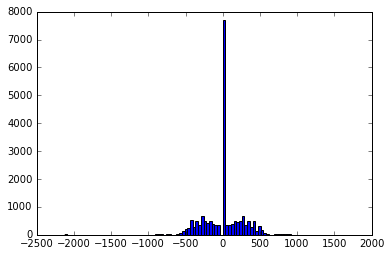

In [119]:
out = plt.hist(p['detfp_x'][ind], weights=p['probability'][ind], bins=100)

In [114]:
p.colnames

['time',
 'energy',
 'polangle',
 'probability',
 'ra',
 'dec',
 'dir',
 'polarization',
 'aperture',
 'y',
 'z',
 'pos',
 'mirror_x',
 'mirror_y',
 'spo',
 'perpplanescatter',
 'inplanescatter',
 'grat_y',
 'grat_z',
 'facet',
 'blaze',
 'order',
 'circ_phi',
 'circ_y',
 'circpix_x',
 'circpix_y',
 'detfp_x',
 'detfp_y',
 'detfppix_y',
 'detfppix_x',
 'wave']

In [89]:
p['probability', 'wave', 'circ_phi', 'order'][ind]

probability,wave,circ_phi,order
,Angstrom,,
float64,float64,float64,float64
0.327676777103,8.0,0.1173009345,-1.0
0.270861063052,8.0,0.0453013608031,-8.0
0.283424139596,8.0,0.165328356698,-7.0
0.283424139593,8.0,0.165334796649,-7.0
0.327676777103,8.0,0.117304826541,-1.0
0.283424139596,8.0,0.165315016499,-7.0
0.328668700223,8.0,0.109325978276,0.0
0.327676777102,8.0,0.117321320624,-1.0


In [62]:
p

time,energy,polangle,probability,ra,dec,dir [4],polarization [4],aperture,y,z,pos [4],mirror_x,mirror_y,spo,perpplanescatter,inplanescatter,grat_y,grat_z,facet,blaze,order,circ_phi,circ_y,circpix_x,circpix_y,wave
s,keV,rad,,deg,deg,,,,,,,,,,,,,,,,,,,,,Angstrom
float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.0,1.5498024115,3.40949866224,0.0,40.0,-15.0,0.000721147931558 .. 0.0,-0.264710785368 .. 0.0,0,-74.0862888122,433.292535978,74.0116274358 .. -0.999000773698,nan,nan,-1.0,2.40190006043e-06,1.09356139916e-05,5.69415823805,4.97354149955,51.0,0.0374524021295,-1.0,nan,nan,nan,nan,8.0
1.0,1.5498024115,0.939445844212,0.0,40.0,-15.0,-8.63633678334e-07 .. 0.0,0.807231380568 .. 0.0,0,-27.8730298625,289.952377399,27.8730298625 .. -1.0,nan,nan,-1.0,-2.14675829102e-06,8.07713897301e-06,nan,nan,-1.0,nan,nan,nan,nan,nan,nan,8.0
2.0,1.5498024115,5.97463303913,0.327676777103,40.0,-15.0,-0.00445271290458 .. 0.0,-0.303762440643 .. 0.0,0,57.5623950913,576.424826944,-684291.803411 .. -12010.5943717,-0.983642184958,27.2909829213,16.0,2.18377553822e-06,1.37772008806e-05,-5.28834534034,8.56166289547,103.0,0.000458811638146,-1.0,nan,nan,nan,nan,8.0
3.0,1.5498024115,1.20902424522,0.328668700221,40.0,-15.0,0.00336023507677 .. 0.0,0.935284257637 .. 0.0,0,-40.380214094,472.367260186,480032.641641 .. -12005.9652369,-2.36679836138,-9.91584243756,10.0,-5.81908051143e-06,-5.59032851925e-06,3.08118590246,7.7459752094,64.0,0.000264512273874,0.0,nan,nan,nan,nan,8.0
4.0,1.5498024115,0.822355160775,0.0,40.0,-15.0,-163.47121284 .. 0.0,0.732439922598 .. 0.0,0,163.308165635,624.550447233,-1959697.98762 .. -12000.0,-6.15529525974,25.5191170234,21.0,-2.41626368538e-06,5.03017689964e-05,nan,nan,-1.0,nan,nan,nan,nan,nan,nan,8.0
5.0,1.5498024115,0.851610826275,0.0,40.0,-15.0,0.000994617260693 .. 0.0,0.752343801212 .. 0.0,0,-67.8537650669,309.558089072,67.8092191395 .. -0.999338486232,nan,nan,-1.0,-1.63775368886e-06,-8.36295138545e-06,3.45556118457,11.6538832074,3.0,0.026958123593,-1.0,nan,nan,nan,nan,8.0
6.0,1.5498024115,4.4217185759,0.294782520165,40.0,-15.0,0.00251670469571 .. 0.0,-0.958069443126 .. 0.0,0,-18.7059974637,404.140193129,222273.064827 .. -12003.1622018,19.4099723347,-11.8930054837,5.0,3.43126222443e-06,1.05394626677e-05,5.80698389122,-2.74927319576,41.0,0.000477895992448,-6.0,nan,nan,nan,nan,8.0
7.0,1.5498024115,4.22142021621,0.0,40.0,-15.0,197.977013392 .. 0.0,-0.8819937227 .. 0.0,0,-197.885522038,732.480066944,2374626.26445 .. -12000.0,-37.3026619521,1.82203696799,26.0,1.5378056638e-06,2.62425065129e-05,nan,nan,-1.0,nan,nan,nan,nan,nan,nan,8.0
